In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#IMPORT

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import feature_selection
from sklearn.impute import SimpleImputer

import seaborn as sns

pd.set_option('display.max_columns', None)

In [ ]:
#READ FILE

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copy of kickstart_econ_updated.csv', encoding='latin1')

In [ ]:
df

,ID,name,category,main_category,currency,user_gender,deadline_date,deadline_time,goal,launched_date,launched_time,pledged,state,backers,country,continent,usd_pledged,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,female,10/9/2015,11:36:00,1000.0,8/11/2015,12:12:28,0.0,failed,0,RU,EU,0.0,143989754,13.3,0.803908,70.264,14.95315,12.019990,23286.080650
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,female,2/26/2013,0:20:50,45000.0,1/12/2013,0:20:50,220.0,failed,3,US,NoA,220.0,324459463,15.1,0.919553,79.222,16.53815,13.217890,53245.076960
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,female,4/16/2012,4:24:11,5000.0,3/17/2012,3:24:11,1.0,failed,1,CA,NoA,1.0,36624199,9.4,0.920284,82.224,16.32500,13.105115,42581.914330
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,female,8/29/2015,1:00:00,19500.0,7/4/2015,8:35:03,1283.0,canceled,14,US,NoA,1283.0,324459463,15.1,0.919553,79.222,16.53815,13.217890,53245.076960
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,female,4/1/2016,13:38:27,50000.0,2/26/2016,13:38:27,52375.0,successful,224,FR,EU,52375.0,64979548,14.0,0.897436,82.359,16.26508,11.625174,38085.400330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314537,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,female,10/17/2014,2:35:30,50000.0,9/17/2014,2:35:30,25.0,canceled,1,MR,AF,25.0,4420184,31.0,0.513106,63.239,8.46379,4.266000,3527.264154
314538,999977640,The Tribe,Narrative Film,Film & Video,USD,male,7/19/2011,3:35:14,1500.0,6/22/2011,3:35:14,155.0,failed,5,MY,AS,155.0,31624264,3.8,0.789450,74.901,13.07991,10.110949,24619.654700
314539,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,male,8/16/2010,5:59:00,15000.0,7/1/2010,19:40:30,20.0,failed,1,US,NoA,20.0,324459463,15.1,0.919553,79.222,16.53815,13.217890,53245.076960
314540,999987933,BioDefense Education Kit,Technology,Technology,USD,male,2/13/2016,2:00:00,15000.0,1/13/2016,18:13:53,200.0,failed,6,AU,OC,200.0,24450561,13.4,0.938680,82.537,20.43272,13.175100,42822.196270


In [ ]:
df.describe()

,ID,goal,pledged,backers,usd_pledged,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
count,3.145420e+05,3.145420e+05,3.145420e+05,314542.000000,3.145420e+05,3.145420e+05,314542.000000,314542.000000,314542.000000,314542.000000,314542.000000,314542.000000
mean,1.073951e+09,4.792114e+04,8.736294e+03,102.426089,7.815763e+03,1.845479e+08,19.324067,0.784119,74.525379,14.703322,10.038148,28130.888922
std,6.191296e+08,1.154758e+06,8.999932e+04,932.600111,8.463990e+04,2.991216e+08,13.607545,0.163246,9.303198,3.198771,3.353524,19993.164238
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,5.100000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.371799e+08,2.000000e+03,3.000000e+01,2.000000,2.500000e+01,2.445056e+07,13.300000,0.691490,70.151000,12.867660,7.678900,10053.337700
50%,1.072818e+09,5.000000e+03,6.100000e+02,12.000000,5.350000e+02,5.731002e+07,15.100000,0.827401,77.495000,15.340480,11.194000,23394.324230
75%,1.610194e+09,1.500000e+04,3.935000e+03,55.000000,3.571000e+03,3.244595e+08,23.000000,0.919553,80.412000,16.538150,13.187626,46250.793820
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,1.409517e+09,82.500000,0.949423,83.684000,20.432720,13.370000,129915.600900


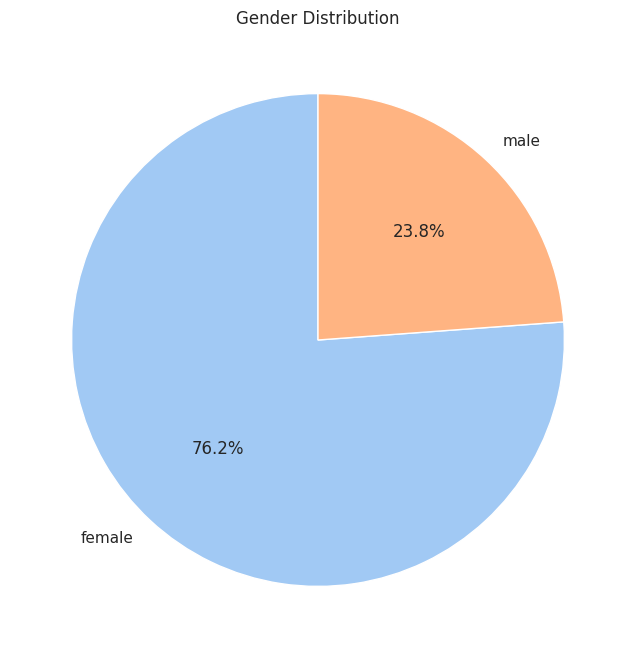

In [ ]:
#DATA VISUALIZATION

# Calculate the percentage of male and female users
gender_counts = df['user_gender'].value_counts()

# Set the style for seaborn
sns.set(style="whitegrid")

# Plotting a pie chart using seaborn and matplotlib
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Gender Distribution')
plt.show()

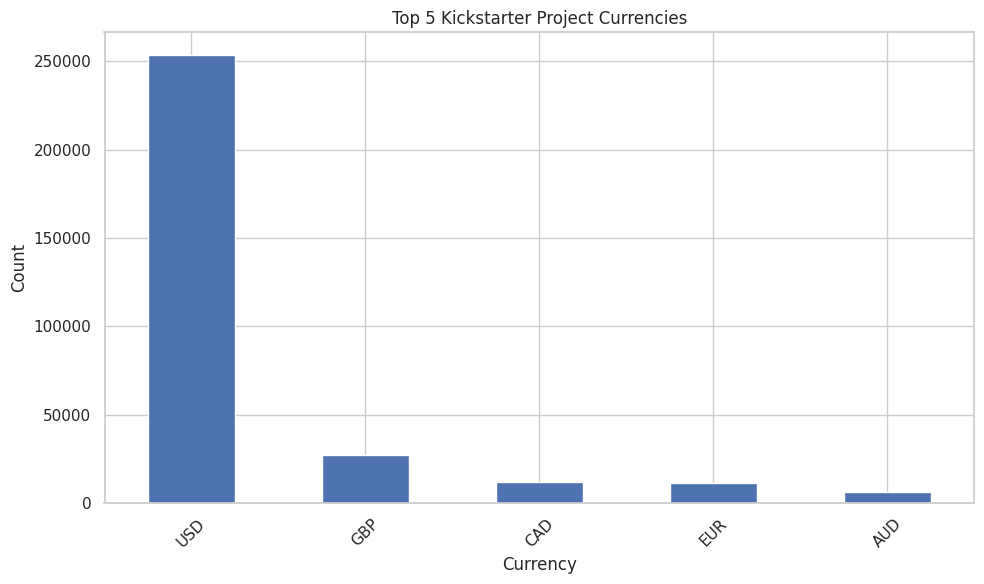

In [ ]:
# Count the occurrences of each currency
currency_counts = df['currency'].value_counts()

# Select the top 5 currencies
top_5_currency_counts = currency_counts.head(5)

# Plot the bar plot
plt.figure(figsize=(10, 6))
top_5_currency_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Currency')
plt.ylabel('Count')
plt.title('Top 5 Kickstarter Project Currencies')

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

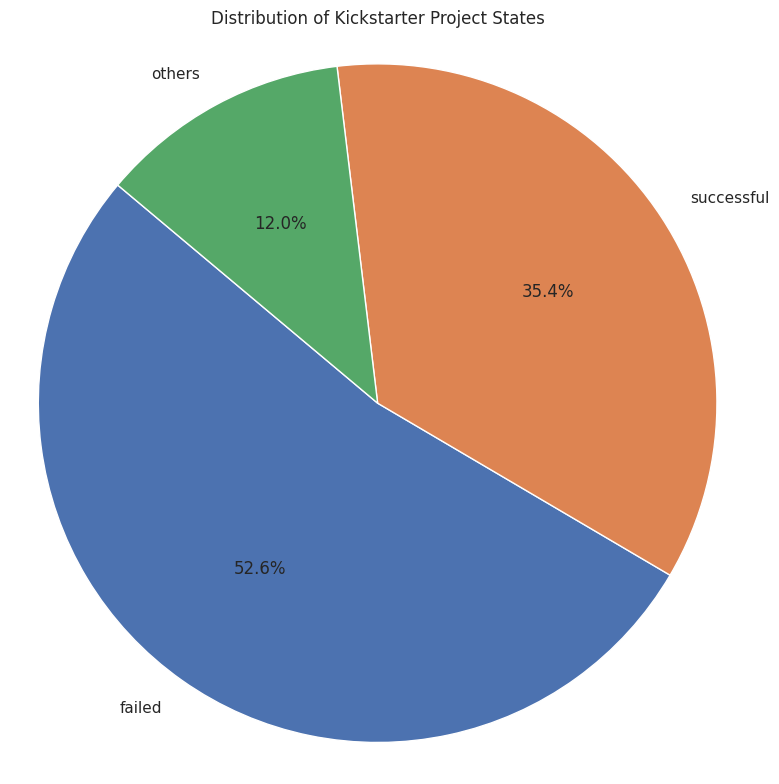

In [ ]:
# Preprocess the 'state' column to group values other than 'successful' and 'failed' as 'others'
df['state'] = df['state'].apply(lambda x: x if x in ['successful', 'failed'] else 'others')

# Count the occurrences of each state
state_counts = df['state'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=140)

# Add title
plt.title('Distribution of Kickstarter Project States')

# Show plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

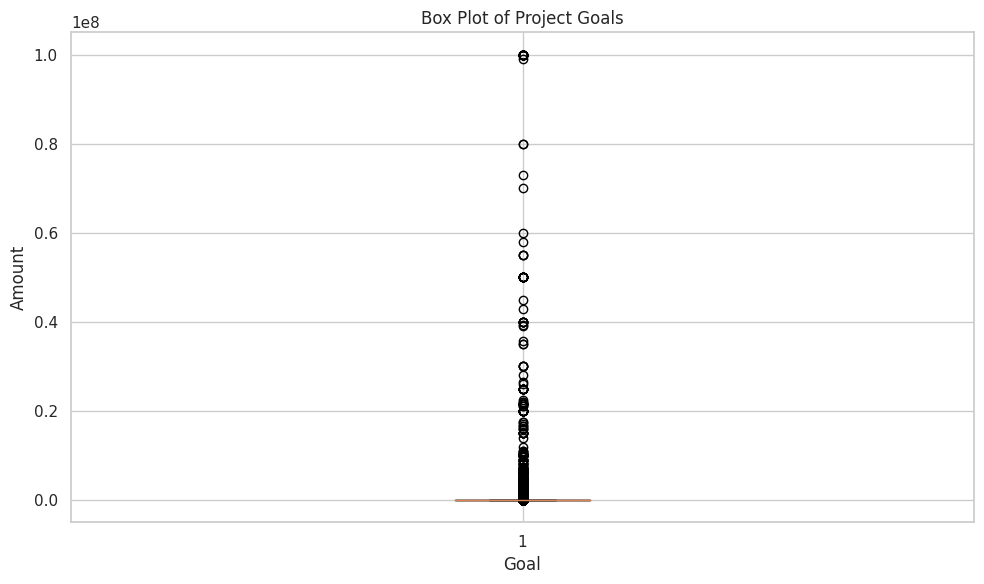

In [ ]:
# Plot box plot for the 'goal' column
plt.figure(figsize=(10, 6))
plt.boxplot(df['goal'])

# Add labels and title
plt.xlabel('Goal')
plt.ylabel('Amount')
plt.title('Box Plot of Project Goals')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-85-7b1e5f479487>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='main_category', data=top_10_main_categories_df, palette='viridis')


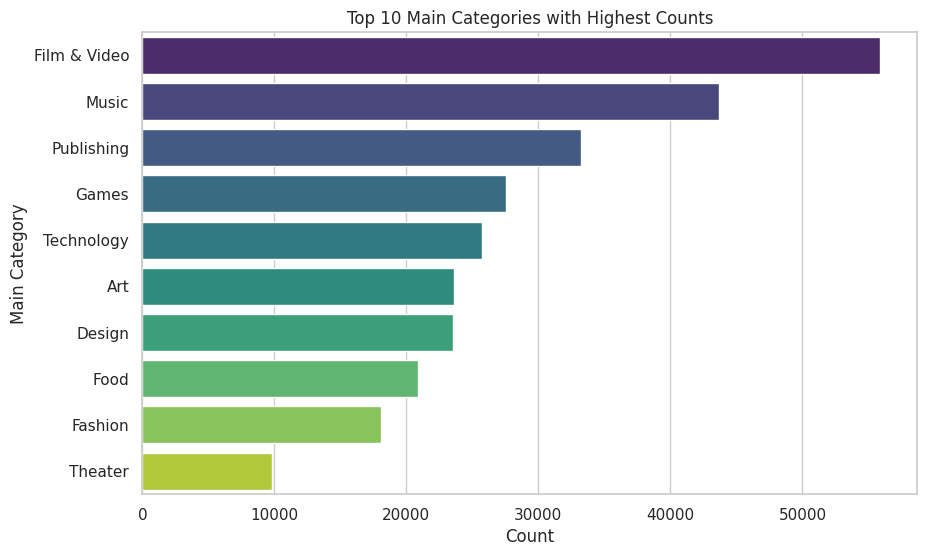

In [ ]:
# Count the frequency of each main category
main_category_counts = df['main_category'].value_counts()

# Select only the top 5 main categories
top_10_main_categories = main_category_counts.nlargest(10)

# Convert the selected categories to a DataFrame for easier plotting
top_10_main_categories_df = top_10_main_categories.reset_index()
top_10_main_categories_df.columns = ['main_category', 'count']

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.barplot(x='count', y='main_category', data=top_10_main_categories_df, palette='viridis')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Main Category')
plt.title('Top 10 Main Categories with Highest Counts')

# Show the plot
plt.show()

<ipython-input-86-47e84b24a31f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='country', data=top_10_countries_df, palette='magma')


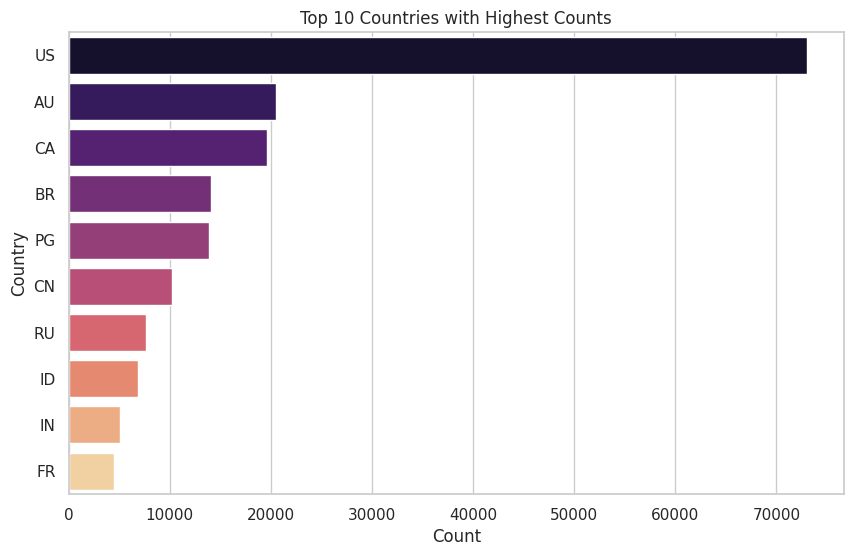

In [ ]:
# Count the frequency of each country
country_counts = df['country'].value_counts()

# Select only the top 10 countries
top_10_countries = country_counts.nlargest(10)

# Convert the selected countries to a DataFrame for easier plotting
top_10_countries_df = top_10_countries.reset_index()
top_10_countries_df.columns = ['country', 'count']

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.barplot(x='count', y='country', data=top_10_countries_df, palette='magma')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Top 10 Countries with Highest Counts')

# Show the plot
plt.show()

<ipython-input-87-a578bbf56c89>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='continent', data=continent_counts_df, palette='crest')


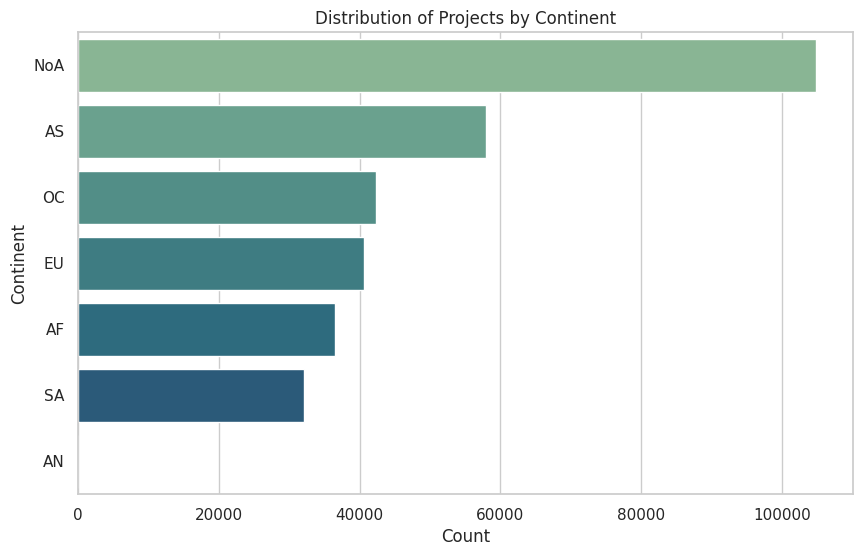

In [ ]:
# Count the frequency of each continent
continent_counts = df['continent'].value_counts()

# Convert the counts to a DataFrame for easier plotting
continent_counts_df = continent_counts.reset_index()
continent_counts_df.columns = ['continent', 'count']

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.barplot(x='count', y='continent', data=continent_counts_df, palette='crest')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Continent')
plt.title('Distribution of Projects by Continent')

# Show the plot
plt.show()

<ipython-input-88-065f8b0d86eb>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='projects_population_ratio', y='country', data=top_10_ratio_countries_df, palette='cubehelix')


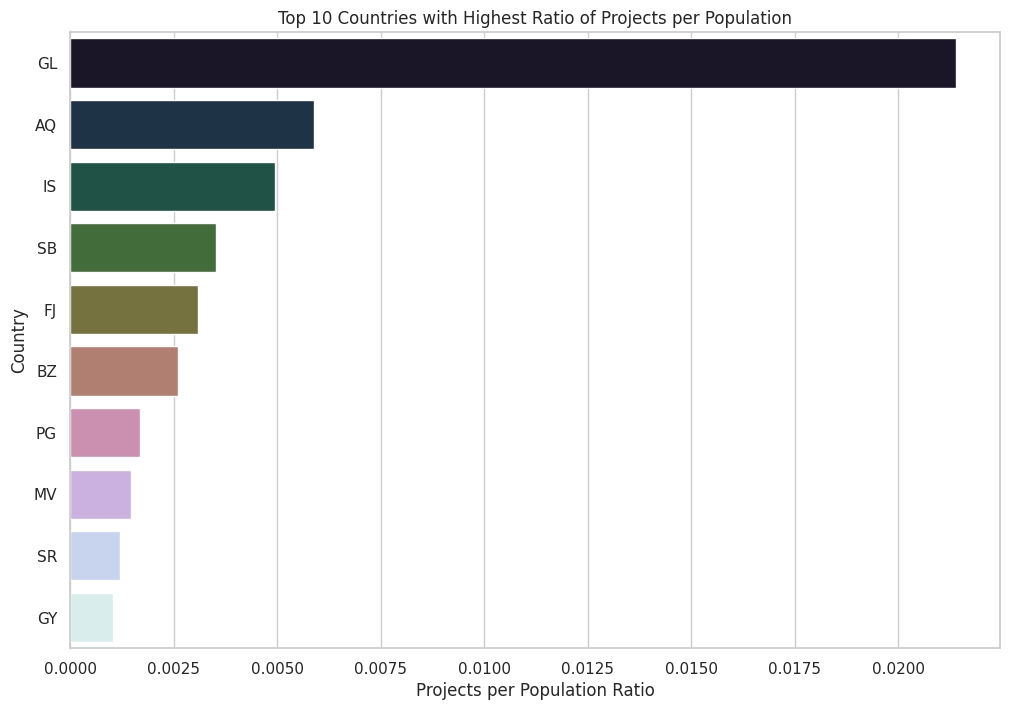

In [ ]:
# Calculate the total number of projects per country
projects_per_country = df['country'].value_counts()

# Calculate the total population per country
population_per_country = df.groupby('country')['population'].first()

# Calculate the ratio of projects per country to population per country
ratio_projects_population = projects_per_country / population_per_country

# Select the top 10 countries with the highest ratios
top_10_ratio_countries = ratio_projects_population.nlargest(10)

# Convert the selected ratios to a DataFrame for easier plotting
top_10_ratio_countries_df = top_10_ratio_countries.reset_index()
top_10_ratio_countries_df.columns = ['country', 'projects_population_ratio']

# Create the bar plot using Seaborn
plt.figure(figsize=(12, 8))  # Adjust the figure size if needed
sns.barplot(x='projects_population_ratio', y='country', data=top_10_ratio_countries_df, palette='cubehelix')

# Add labels and title
plt.xlabel('Projects per Population Ratio')
plt.ylabel('Country')
plt.title('Top 10 Countries with Highest Ratio of Projects per Population')

# Show the plot
plt.show()

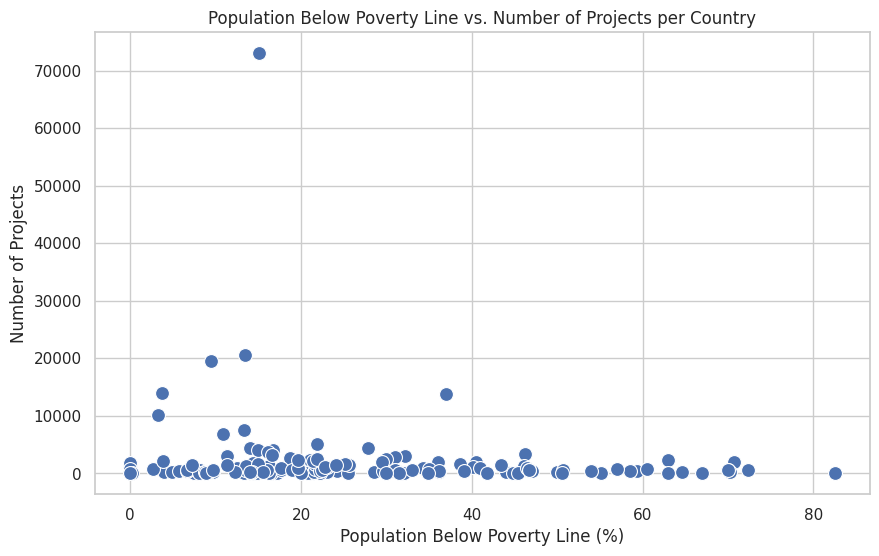

In [ ]:
# Group by country and calculate the mean 'population_below_poverty_line' and the count of projects per country
country_stats = df.groupby('country').agg({'population_below_poverty_line': 'mean', 'ID': 'count'})
country_stats.reset_index(inplace=True)
country_stats.columns = ['country', 'population_below_poverty_line', 'number_of_projects']

# Create the scatter plot using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.scatterplot(x='population_below_poverty_line', y='number_of_projects', data=country_stats, s=100)

# Add labels and title
plt.xlabel('Population Below Poverty Line (%)')
plt.ylabel('Number of Projects')
plt.title('Population Below Poverty Line vs. Number of Projects per Country')

# Show the plot
plt.show()

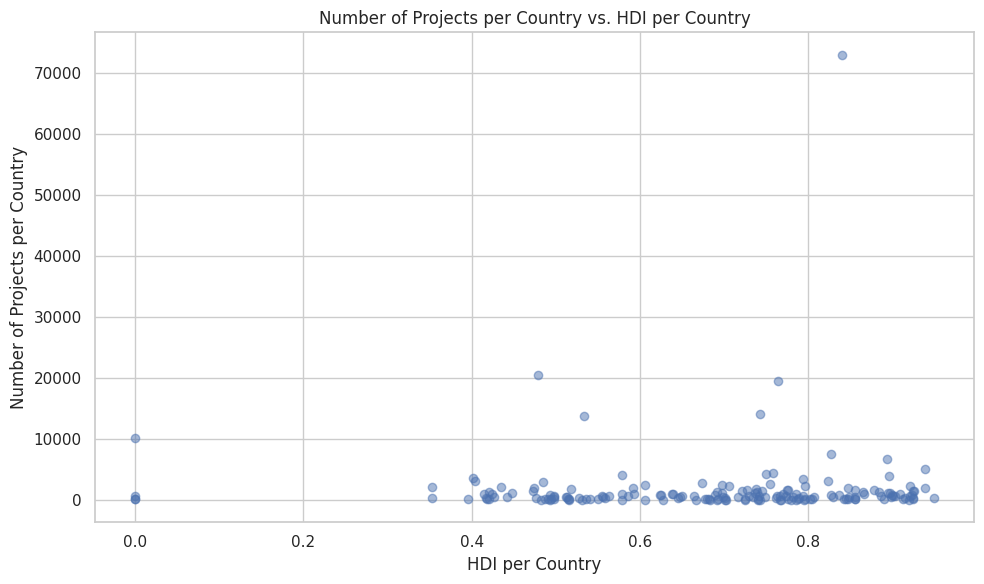

In [ ]:
# Group the data by country and calculate the number of projects and mean HDI per country
projects_per_country = df['country'].value_counts()
hdi_per_country = df.groupby('country')['hdi'].mean()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(hdi_per_country, projects_per_country, alpha=0.5)

# Add labels and title
plt.xlabel('HDI per Country')
plt.ylabel('Number of Projects per Country')
plt.title('Number of Projects per Country vs. HDI per Country')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# DATA PREPROCESSING
df_cleaned = df.dropna()
df_cleaned

,ID,name,category,main_category,currency,user_gender,deadline_date,deadline_time,goal,launched_date,launched_time,pledged,state,backers,country,continent,usd_pledged,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,female,10/9/2015,11:36:00,1000.0,8/11/2015,12:12:28,0.0,failed,0,RU,EU,0.0,143989754,13.3,0.803908,70.264,14.95315,12.019990,23286.080650
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,female,2/26/2013,0:20:50,45000.0,1/12/2013,0:20:50,220.0,failed,3,US,NoA,220.0,324459463,15.1,0.919553,79.222,16.53815,13.217890,53245.076960
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,female,4/16/2012,4:24:11,5000.0,3/17/2012,3:24:11,1.0,failed,1,CA,NoA,1.0,36624199,9.4,0.920284,82.224,16.32500,13.105115,42581.914330
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,female,8/29/2015,1:00:00,19500.0,7/4/2015,8:35:03,1283.0,others,14,US,NoA,1283.0,324459463,15.1,0.919553,79.222,16.53815,13.217890,53245.076960
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,female,4/1/2016,13:38:27,50000.0,2/26/2016,13:38:27,52375.0,successful,224,FR,EU,52375.0,64979548,14.0,0.897436,82.359,16.26508,11.625174,38085.400330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314537,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,female,10/17/2014,2:35:30,50000.0,9/17/2014,2:35:30,25.0,others,1,MR,AF,25.0,4420184,31.0,0.513106,63.239,8.46379,4.266000,3527.264154
314538,999977640,The Tribe,Narrative Film,Film & Video,USD,male,7/19/2011,3:35:14,1500.0,6/22/2011,3:35:14,155.0,failed,5,MY,AS,155.0,31624264,3.8,0.789450,74.901,13.07991,10.110949,24619.654700
314539,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,male,8/16/2010,5:59:00,15000.0,7/1/2010,19:40:30,20.0,failed,1,US,NoA,20.0,324459463,15.1,0.919553,79.222,16.53815,13.217890,53245.076960
314540,999987933,BioDefense Education Kit,Technology,Technology,USD,male,2/13/2016,2:00:00,15000.0,1/13/2016,18:13:53,200.0,failed,6,AU,OC,200.0,24450561,13.4,0.938680,82.537,20.43272,13.175100,42822.196270


In [ ]:
# Convert 'deadline_date' and 'launched_date' to datetime format
df_cleaned['deadline_date'] = pd.to_datetime(df_cleaned['deadline_date'], errors='coerce')
df_cleaned['launched_date'] = pd.to_datetime(df_cleaned['launched_date'], errors='coerce')

# Calculate the duration of the campaign
df_cleaned['campaign_duration'] = (df_cleaned['deadline_date'] - df_cleaned['launched_date']).dt.days

# Convert the duration to number of days
# df_cleaned['campaign_duration_days'] = df_cleaned['campaign_duration'].dt.days

# Print the DataFrame with the new column
df_cleaned[['launched_date', 'deadline_date', 'campaign_duration']]

,launched_date,deadline_date,campaign_duration
0,2015-08-11,2015-10-09,59
1,2013-01-12,2013-02-26,45
2,2012-03-17,2012-04-16,30
3,2015-07-04,2015-08-29,56
4,2016-02-26,2016-04-01,35
...,...,...,...
314537,2014-09-17,2014-10-17,30
314538,2011-06-22,2011-07-19,27
314539,2010-07-01,2010-08-16,46
314540,2016-01-13,2016-02-13,31


In [ ]:
# Filter the 'state' column to include only 'successful' and 'failed' values
filtered_df = df_cleaned[df_cleaned['state'].isin(['successful', 'failed'])]
filtered_df['state']

0             failed
1             failed
2             failed
4         successful
5         successful
             ...    
314535        failed
314538        failed
314539        failed
314540        failed
314541        failed
Name: state, Length: 276863, dtype: object

In [ ]:
greenland_projects = df_cleaned[df_cleaned['country'] == 'GL']
greenland_projects

,ID,name,category,main_category,currency,user_gender,deadline_date,deadline_time,goal,launched_date,launched_time,pledged,state,backers,country,continent,usd_pledged,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni,campaign_duration
20,1000091520,The Book Zoo - A Mini-Comic,Comics,Comics,USD,female,2014-11-12,17:15:50,175.0,2014-10-23,17:15:50,701.66,successful,66,GL,NoA,701.66,56656,16.2,0.786,71.4,10.88,8.3476,4371.345,20
521,1002894446,Carnival Arts Exhibit at Miami International A...,Art,Art,USD,female,2013-01-27,21:50:10,5000.0,2012-12-28,21:50:10,5001.31,successful,35,GL,NoA,5001.31,56656,16.2,0.786,71.4,10.88,8.3476,4371.345,30
1001,1005999335,wecemat Â The ecologic automated flush adapter,Technology,Technology,EUR,female,2016-07-23,14:07:08,40000.0,2016-06-23,14:07:08,7750.00,failed,26,GL,NoA,8235.00,56656,16.2,0.786,71.4,10.88,8.3476,4371.345,30
1498,1009138334,The Adventure of SEAWAY - A Short Film,Film & Video,Film & Video,USD,male,2014-03-03,21:12:35,4000.0,2014-02-03,21:12:35,4126.00,successful,44,GL,NoA,4126.00,56656,16.2,0.786,71.4,10.88,8.3476,4371.345,28
1978,1012238393,Welcome to Mommy's E-Z Baking,Food,Food,USD,female,2014-10-06,18:23:55,1500.0,2014-09-06,18:23:55,70.00,failed,4,GL,NoA,70.00,56656,16.2,0.786,71.4,10.88,8.3476,4371.345,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313257,992217105,Le Bougre (The Booger) - The Multi-Language Fi...,Shorts,Film & Video,USD,male,2011-01-15,23:10:52,2280.0,2010-12-16,23:10:52,0.00,failed,0,GL,NoA,0.00,56656,16.2,0.786,71.4,10.88,8.3476,4371.345,30
313279,992364809,GI Joe ARAH Figure: Commando,Tabletop Games,Games,USD,female,2012-11-26,6:23:25,1000.0,2012-11-19,6:23:25,276.00,failed,15,GL,NoA,276.00,56656,16.2,0.786,71.4,10.88,8.3476,4371.345,7
313491,993694473,IGo-AIRÂ -Fill a Flat Tire FAST Using your Ex...,Gadgets,Technology,USD,female,2014-11-30,21:23:22,50000.0,2014-10-31,20:23:22,261.00,failed,10,GL,NoA,261.00,56656,16.2,0.786,71.4,10.88,8.3476,4371.345,30
313792,995538414,Make a Tomato Pie !,Food,Food,USD,female,2014-09-14,19:16:03,10.0,2014-07-16,19:16:03,27.00,successful,8,GL,NoA,27.00,56656,16.2,0.786,71.4,10.88,8.3476,4371.345,60


In [ ]:
df_cleaned

,ID,name,category,main_category,currency,user_gender,deadline_date,deadline_time,goal,launched_date,launched_time,pledged,state,backers,country,continent,usd_pledged,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni,campaign_duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,female,2015-10-09,11:36:00,1000.0,2015-08-11,12:12:28,0.0,failed,0,RU,EU,0.0,143989754,13.3,0.803908,70.264,14.95315,12.019990,23286.080650,59
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,female,2013-02-26,0:20:50,45000.0,2013-01-12,0:20:50,220.0,failed,3,US,NoA,220.0,324459463,15.1,0.919553,79.222,16.53815,13.217890,53245.076960,45
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,female,2012-04-16,4:24:11,5000.0,2012-03-17,3:24:11,1.0,failed,1,CA,NoA,1.0,36624199,9.4,0.920284,82.224,16.32500,13.105115,42581.914330,30
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,female,2015-08-29,1:00:00,19500.0,2015-07-04,8:35:03,1283.0,others,14,US,NoA,1283.0,324459463,15.1,0.919553,79.222,16.53815,13.217890,53245.076960,56
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,female,2016-04-01,13:38:27,50000.0,2016-02-26,13:38:27,52375.0,successful,224,FR,EU,52375.0,64979548,14.0,0.897436,82.359,16.26508,11.625174,38085.400330,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314537,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,female,2014-10-17,2:35:30,50000.0,2014-09-17,2:35:30,25.0,others,1,MR,AF,25.0,4420184,31.0,0.513106,63.239,8.46379,4.266000,3527.264154,30
314538,999977640,The Tribe,Narrative Film,Film & Video,USD,male,2011-07-19,3:35:14,1500.0,2011-06-22,3:35:14,155.0,failed,5,MY,AS,155.0,31624264,3.8,0.789450,74.901,13.07991,10.110949,24619.654700,27
314539,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,male,2010-08-16,5:59:00,15000.0,2010-07-01,19:40:30,20.0,failed,1,US,NoA,20.0,324459463,15.1,0.919553,79.222,16.53815,13.217890,53245.076960,46
314540,999987933,BioDefense Education Kit,Technology,Technology,USD,male,2016-02-13,2:00:00,15000.0,2016-01-13,18:13:53,200.0,failed,6,AU,OC,200.0,24450561,13.4,0.938680,82.537,20.43272,13.175100,42822.196270,31


In [ ]:
filtered_df = df_cleaned[df_cleaned['state'].isin(['failed', 'successful'])]
filtered_df = df_cleaned.drop(df_cleaned[~df_cleaned['state'].isin(['failed', 'successful'])].index)
df_cleaned = filtered_df.copy()
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned

,ID,name,category,main_category,currency,user_gender,deadline_date,deadline_time,goal,launched_date,launched_time,pledged,state,backers,country,continent,usd_pledged,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni,campaign_duration
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,female,2015-10-09,11:36:00,1000.0,2015-08-11,12:12:28,0.0,failed,0,RU,EU,0.0,143989754,13.3,0.803908,70.264,14.95315,12.019990,23286.080650,59
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,female,2013-02-26,0:20:50,45000.0,2013-01-12,0:20:50,220.0,failed,3,US,NoA,220.0,324459463,15.1,0.919553,79.222,16.53815,13.217890,53245.076960,45
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,female,2012-04-16,4:24:11,5000.0,2012-03-17,3:24:11,1.0,failed,1,CA,NoA,1.0,36624199,9.4,0.920284,82.224,16.32500,13.105115,42581.914330,30
3,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,female,2016-04-01,13:38:27,50000.0,2016-02-26,13:38:27,52375.0,successful,224,FR,EU,52375.0,64979548,14.0,0.897436,82.359,16.26508,11.625174,38085.400330,35
4,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,female,2014-12-21,18:30:44,1000.0,2014-12-01,18:30:44,1205.0,successful,16,SA,AS,1205.0,32938213,13.6,0.846602,74.444,16.11227,9.627520,51320.113230,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276858,999972264,Islanda,Documentary,Film & Video,USD,female,2012-03-16,3:31:10,1700.0,2012-02-15,4:31:10,25.0,failed,1,KE,AF,25.0,49699862,43.4,0.554679,62.164,11.08000,6.314098,2880.739597,30
276859,999977640,The Tribe,Narrative Film,Film & Video,USD,male,2011-07-19,3:35:14,1500.0,2011-06-22,3:35:14,155.0,failed,5,MY,AS,155.0,31624264,3.8,0.789450,74.901,13.07991,10.110949,24619.654700,27
276860,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,male,2010-08-16,5:59:00,15000.0,2010-07-01,19:40:30,20.0,failed,1,US,NoA,20.0,324459463,15.1,0.919553,79.222,16.53815,13.217890,53245.076960,46
276861,999987933,BioDefense Education Kit,Technology,Technology,USD,male,2016-02-13,2:00:00,15000.0,2016-01-13,18:13:53,200.0,failed,6,AU,OC,200.0,24450561,13.4,0.938680,82.537,20.43272,13.175100,42822.196270,31


In [99]:
df_cleaned.to_csv('/content/drive/MyDrive/Colab Notebooks/kickstart_econ_final.csv', index = False)